In [133]:
import pandas as pd
import numpy as np
import matplotlib as nlp
import re
import nltk

In [106]:
#read file
tweets  = pd.read_csv("/content/drive/MyDrive/tweets/World Cup 2022 Tweets.csv")
#display the first tweets
tweets.head()

,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source
0,Craig Forrest,NaN,2011-01-14 19:09:55+00:00,20346.0,18790,TRUE,2023-01-18 15:49:26+00:00,Thanks Oso for sharing your experience at the ...,Twitter for iPhone
1,Hosayni Official,NaN,2022-06-22 23:22:12+00:00,7.0,93,FALSE,2023-01-18 15:33:42+00:00,1 month ago at #QatarWorldCup2022 #Davido 001 ...,Twitter for Android
2,꧁Jineesh Janardhanan꧂,Harippad (Alappuzha ),2019-08-25 10:32:09+00:00,2414.0,15326,FALSE,2023-01-18 14:18:42+00:00,It's been exactly a month 🏆\n#Argentina #Qatar...,Twitter for Android
3,iLOT,NaN,2021-07-15 03:20:39+00:00,3201.0,421,FALSE,2023-01-18 13:46:52+00:00,Exactly one month 🏆\n#QatarWorldCup2022 https:...,TweetDeck
4,Chanda Dalmiya,"Kolkata, India",2020-03-07 10:50:09+00:00,397.0,13600,FALSE,2023-01-18 13:46:34+00:00,@a23_fantasy Answer :- D) 6 Times\n\n#ContestA...,Twitter for Android


clearing duplicates

In [107]:
tweets.drop_duplicates(subset='text',inplace=True)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119970 entries, 0 to 124677
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_name        119970 non-null  object 
 1   user_location    75907 non-null   object 
 2   user_created     119969 non-null  object 
 3   user_followers   119969 non-null  float64
 4   user_favourites  119969 non-null  object 
 5   user_verified    119969 non-null  object 
 6   date             119969 non-null  object 
 7   text             119969 non-null  object 
 8   source           119966 non-null  object 
dtypes: float64(1), object(8)
memory usage: 9.2+ MB


deep cleaning

In [108]:
#replace all NaN values wit an empty string
tweets = tweets.replace(np.nan, '')
tweets.shape
# function for twitter text cleaning
def tweet_cleaner(text):
    #remove RT
    text = re.sub("RT @[\w]*:","",text)
    #remove twitter handles (@user)
    text = re.sub("(@[A-Za-z0-9_]+)","", text)
    #remove url links
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    # remove whitespaces
    text = ' '.join(text.split())
    return text
#Apply text cleaning function to text column in tweets dataframe
tweets['text'] = tweets['text'].apply(lambda x:tweet_cleaner(x))
tweets.shape

(119970, 9)

In [109]:
tweets = tweets.sample(frac=1)
tweets = tweets[:200000]
print("Dataset shape:", tweets.shape)

Dataset shape: (119970, 9)


In [ ]:
#downloading the vader lexicon from nltk
!pip install vaderSentiment
!pip install twython
nltk.download('vader_lexicon')#importing sentimentintensityanaylzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [113]:
tweets['scores'] = tweets['text'].apply(lambda text: sid.polarity_scores(text))
tweets.head(5)

,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source,scores
74950,Dwaipayan Mukherjee,"New Delhi, India",2014-07-22 13:46:48+00:00,158.0,5588,FALSE,2022-12-06 17:59:50+00:00,Football grows because of games like this ✨ #Q...,Twitter for iPhone,"{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'comp..."
119609,ChrisMaguire,North West,2012-01-02 19:21:37+00:00,8733.0,28328,FALSE,2022-11-20 18:46:40+00:00,In my humble opinion you’re taking rubbish. Th...,Twitter for iPhone,"{'neg': 0.081, 'neu': 0.858, 'pos': 0.061, 'co..."
113122,Roselin,India,2019-10-14 11:37:28+00:00,148.0,0,FALSE,2022-11-22 11:12:16+00:00,⚽ Watch Qatar FIFA World Cup 2022 Argentina-vs...,Twitter Web App,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
42582,Hashim Habibzada,Washington DC,2012-04-03 21:12:07+00:00,572.0,128,TRUE,2022-12-14 21:50:09+00:00,#Morocco played well in #FOOTBALLWORLDCUP #Qat...,Twitter Web App,"{'neg': 0.0, 'neu': 0.523, 'pos': 0.477, 'comp..."
66928,war news,United States,2022-11-12 22:59:25+00:00,28.0,3,FALSE,2022-12-09 11:57:48+00:00,Ukraine War: Inside the battle for Bakhmut ##r...,Twitter for Android,"{'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'comp..."


In [115]:
def sentimentPredict(sentiment):
    if sentiment['compound'] >= 0.05:
      return "Positive"
    elif sentiment['compound'] <= -0.05: 
      return "Negative"
    else:
      return "Neutral"
final_df = tweets
tweets['sentiment'] = final_df['scores'].apply(lambda x: sentimentPredict(x))
tweets.head(5)

,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source,scores,sentiment
74950,Dwaipayan Mukherjee,"New Delhi, India",2014-07-22 13:46:48+00:00,158.0,5588,FALSE,2022-12-06 17:59:50+00:00,Football grows because of games like this ✨ #Q...,Twitter for iPhone,"{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'comp...",Positive
119609,ChrisMaguire,North West,2012-01-02 19:21:37+00:00,8733.0,28328,FALSE,2022-11-20 18:46:40+00:00,In my humble opinion you’re taking rubbish. Th...,Twitter for iPhone,"{'neg': 0.081, 'neu': 0.858, 'pos': 0.061, 'co...",Negative
113122,Roselin,India,2019-10-14 11:37:28+00:00,148.0,0,FALSE,2022-11-22 11:12:16+00:00,⚽ Watch Qatar FIFA World Cup 2022 Argentina-vs...,Twitter Web App,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
42582,Hashim Habibzada,Washington DC,2012-04-03 21:12:07+00:00,572.0,128,TRUE,2022-12-14 21:50:09+00:00,#Morocco played well in #FOOTBALLWORLDCUP #Qat...,Twitter Web App,"{'neg': 0.0, 'neu': 0.523, 'pos': 0.477, 'comp...",Positive
66928,war news,United States,2022-11-12 22:59:25+00:00,28.0,3,FALSE,2022-12-09 11:57:48+00:00,Ukraine War: Inside the battle for Bakhmut ##r...,Twitter for Android,"{'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'comp...",Negative


In [123]:
tweets = tweets.replace(['Positive','Neutral','Negative'],[2, 1, 0])

In [124]:
tweets.head(5)

,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source,scores,sentiment
74950,Dwaipayan Mukherjee,"New Delhi, India",2014-07-22 13:46:48+00:00,158.0,5588,FALSE,2022-12-06 17:59:50+00:00,Football grows because of games like this ✨ #Q...,Twitter for iPhone,"{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'comp...",2
119609,ChrisMaguire,North West,2012-01-02 19:21:37+00:00,8733.0,28328,FALSE,2022-11-20 18:46:40+00:00,In my humble opinion you’re taking rubbish. Th...,Twitter for iPhone,"{'neg': 0.081, 'neu': 0.858, 'pos': 0.061, 'co...",0
113122,Roselin,India,2019-10-14 11:37:28+00:00,148.0,0,FALSE,2022-11-22 11:12:16+00:00,⚽ Watch Qatar FIFA World Cup 2022 Argentina-vs...,Twitter Web App,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1
42582,Hashim Habibzada,Washington DC,2012-04-03 21:12:07+00:00,572.0,128,TRUE,2022-12-14 21:50:09+00:00,#Morocco played well in #FOOTBALLWORLDCUP #Qat...,Twitter Web App,"{'neg': 0.0, 'neu': 0.523, 'pos': 0.477, 'comp...",2
66928,war news,United States,2022-11-12 22:59:25+00:00,28.0,3,FALSE,2022-12-09 11:57:48+00:00,Ukraine War: Inside the battle for Bakhmut ##r...,Twitter for Android,"{'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'comp...",0


In [ ]:
tweets.drop(['user_name','user_location','user_created','user_followers','user_favourites','user_verified','date','source','scores'], axis=1, inplace=True)

In [131]:
tweets['text'] = tweets['text'].astype('str')


Check the number of positive vs. negative tagged sentences

In [132]:
positives = tweets['sentiment'][tweets.sentiment == 2 ]
negatives = tweets['sentiment'][tweets.sentiment == 0 ]

print('Total length of the data is:         {}'.format(tweets.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         119970
No. of positve tagged sentences is:  54577
No. of negative tagged sentences is: 20254


In [134]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [142]:
#removing shortwords
tweets['text']=tweets['text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
tweets.head(5)

,text,sentiment
74950,Football grows because games like this #QatarW...,2
119609,humble opinion you’re taking rubbish. mouthpie...,0
113122,Watch Qatar FIFA World 2022 Argentina-vs-saudi...,1
42582,#Morocco played well #FOOTBALLWORLDCUP #Qatar2...,2
66928,Ukraine War: Inside battle Bakhmut ##russiaIsA...,0


In [143]:
from sklearn.utils import shuffle
tweets =  shuffle(tweets).reset_index(drop=True)

In [144]:
tokenized_tweet=tweets['text'].apply(lambda x: x.split())
tokenized_tweet.head(5)

0    [#Netherlands, outstanding, game, against, #US...
1    [there, Hacking, attempts, your, device?, assi...
2    [Argentina, France, World, 2022, Final, Live, ...
3    [World, Surprise, Corrupt, Chair,, India, also...
4    [prediction, #Qatar2022, Argentina, France, Mo...
Name: text, dtype: object

In [145]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(tweets['text'].values.astype('U'))


Train/Test Split¶


In [146]:
from sklearn.model_selection import train_test_split
X=text_counts
y=tweets['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19)


Naive Bayes

In [147]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
cnb = ComplementNB()
cnb.fit(X_train, y_train)
cross_cnb = cross_val_score(cnb, X, y,n_jobs = -1)
print("Cross Validation score = ",cross_cnb)                
print ("Train accuracy ={:.2f}%".format(cnb.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(cnb.score(X_test,y_test)*100))
train_acc_cnb=cnb.score(X_train,y_train)
test_acc_cnb=cnb.score(X_test,y_test)

Cross Validation score =  [0.72943236 0.72980745 0.72255564 0.7211803  0.72584813]
Train accuracy =79.71%
Test accuracy =72.85%


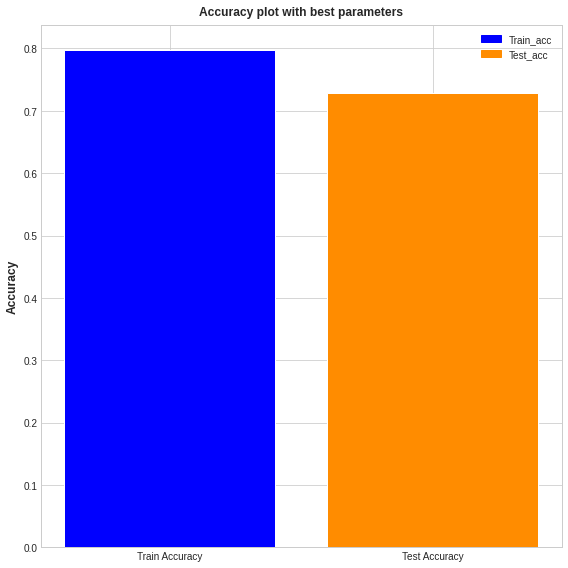

In [148]:
#plotting the best parameters
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data_cnb = [train_acc_cnb,test_acc_cnb]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_cnb)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_cnb)), data_cnb,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()


Confusion Matrix

In [149]:
from sklearn.metrics import *
#Predict test data set
y_pred_cnb =cnb.predict(X_test)

#This is the confusion matrix :
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_cnb))

[[2812  334  899]
 [1109 5437 2464]
 [ 654 1054 9231]]


In [151]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_cnb))

              precision    recall  f1-score   support

           0       0.61      0.70      0.65      4045
           1       0.80      0.60      0.69      9010
           2       0.73      0.84      0.78     10939

    accuracy                           0.73     23994
   macro avg       0.71      0.71      0.71     23994
weighted avg       0.74      0.73      0.73     23994




Calculating F1, prescision and recall scores

In [152]:
from sklearn.metrics import *

print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred_cnb, average="macro")*100))
f1_cnb=f1_score(y_test, y_pred_cnb, average="macro")
print("Precision score ={:.2f}%".format(precision_score(y_test, y_pred_cnb, average="macro")*100))
precision_cnb=precision_score(y_test, y_pred_cnb, average="macro")
print("Recall score ={:.2f}%".format(recall_score(y_test, y_pred_cnb, average="macro")*100))  
recall_cnb=recall_score(y_test, y_pred_cnb, average="macro")

F1 score =70.79%
Precision score =71.47%
Recall score =71.42%
